Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.


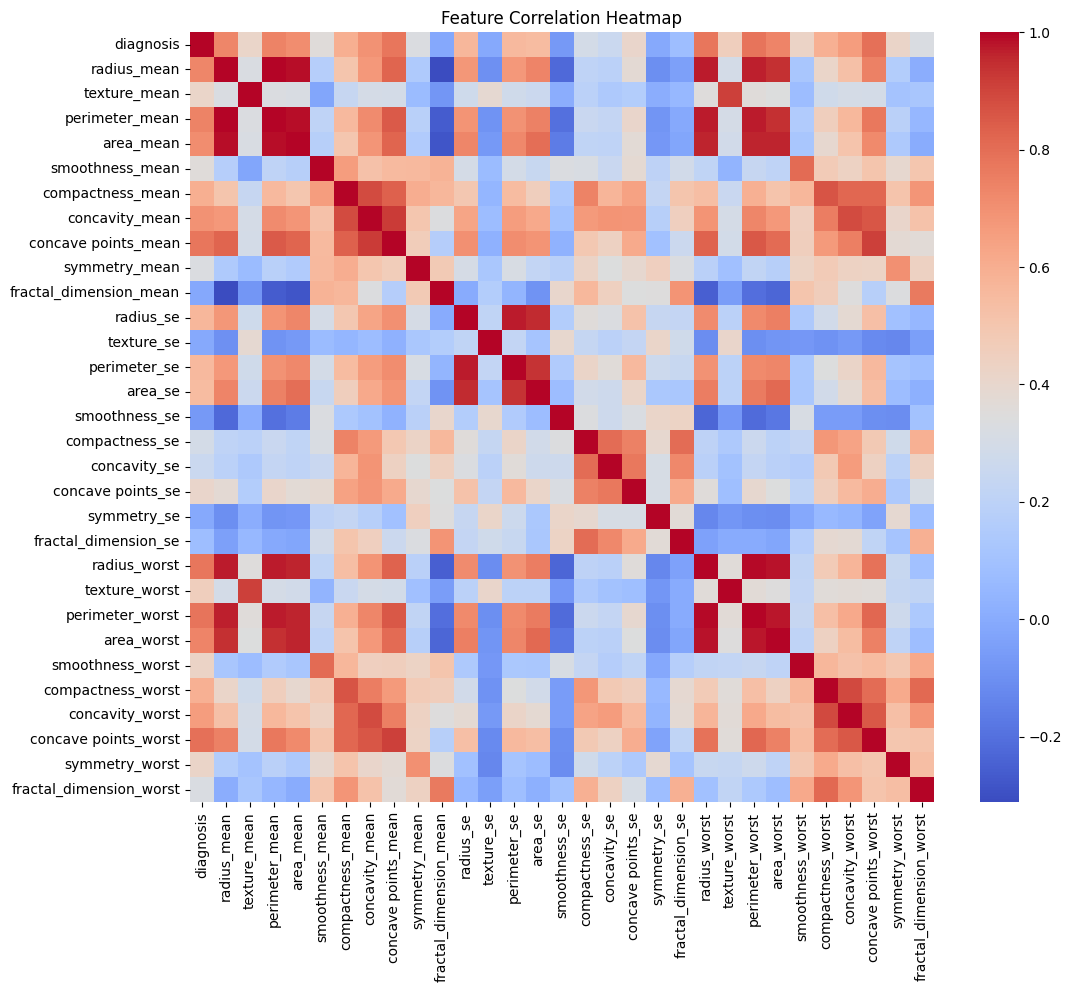

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training the Artificial Neural Network...


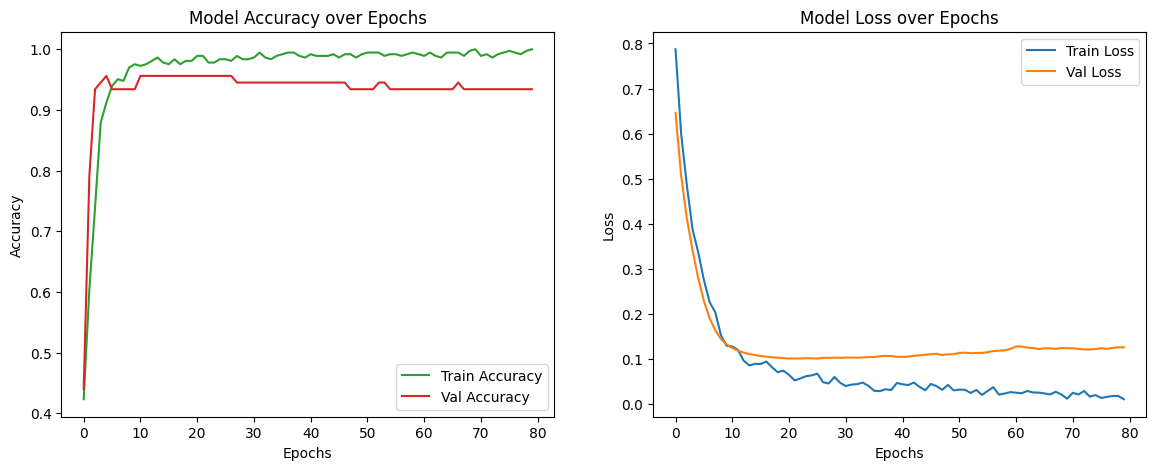

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


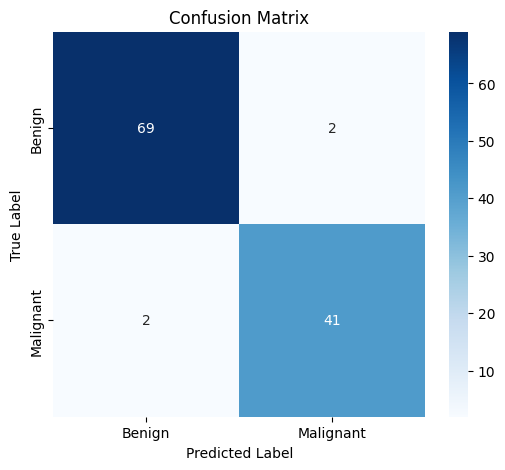

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


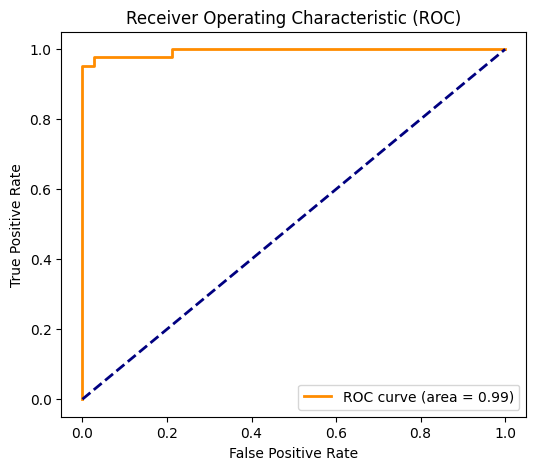


Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        71
   Malignant       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [4]:
# !pip install kagglehub seaborn matplotlib scikit-learn tensorflow

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow.keras import layers, models

# ==========================================
# 1. DATA ACQUISITION & CLEANING
# ==========================================
print("Downloading dataset...")
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
df = pd.read_csv(f"{path}/data.csv")

# Clean data: Remove 'id' and the empty 'Unnamed: 32' column
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Encode Target: Malignant (M) -> 1, Benign (B) -> 0
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# ==========================================
# 2. VISUALIZATION: Feature Correlation
# ==========================================
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# ==========================================
# 3. PREPROCESSING
# ==========================================
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Crucial for Neural Networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==========================================
# 4. BUILD THE ANN
# ==========================================
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ==========================================
# 5. TRAIN THE MODEL
# ==========================================
print("\nTraining the Artificial Neural Network...")
history = model.fit(X_train, y_train, epochs=80, validation_split=0.2, verbose=0)

# ==========================================
# 6. PERFORMANCE VISUALIZATIONS
# ==========================================

# A. Training History (Loss and Accuracy)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#2ca02c')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='#d62728')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='#1f77b4')
plt.plot(history.history['val_loss'], label='Val Loss', color='#ff7f0e')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# B. Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# C. ROC Curve
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Final Metrics Output
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))